In [1]:
!pip install kaggle

In [6]:
import json
import os

kaggle_credentials = {
    "username": "harshinigopisetty",
    "key": "7720ebc4a463de846328125106e28e42"
}

# Create the .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Write the credentials to kaggle.json
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
    json.dump(kaggle_credentials, f)

# Set correct permissions
!chmod 600 ~/.kaggle/kaggle.json

print('kaggle.json created and permissions set.')

kaggle.json created and permissions set.


In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 81% 133M/163M [00:00<00:00, 1.39GB/s]
100% 163M/163M [00:00<00:00, 1.23GB/s]


In [8]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
!ls

data  face-mask-dataset.zip  sample_data


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1030.jpg', 'with_mask_344.jpg', 'with_mask_1163.jpg', 'with_mask_3413.jpg', 'with_mask_1077.jpg']
['with_mask_2546.jpg', 'with_mask_2784.jpg', 'with_mask_305.jpg', 'with_mask_1878.jpg', 'with_mask_442.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2092.jpg', 'without_mask_667.jpg', 'without_mask_1435.jpg', 'without_mask_1395.jpg', 'without_mask_3358.jpg']
['without_mask_2409.jpg', 'without_mask_3807.jpg', 'without_mask_975.jpg', 'without_mask_3532.jpg', 'without_mask_2247.jpg']


In [14]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [15]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


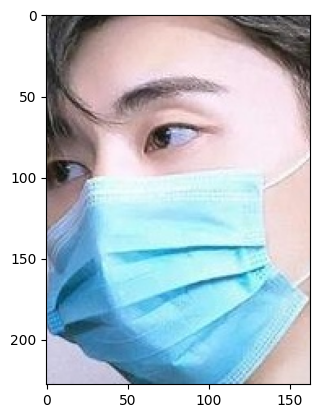

In [19]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

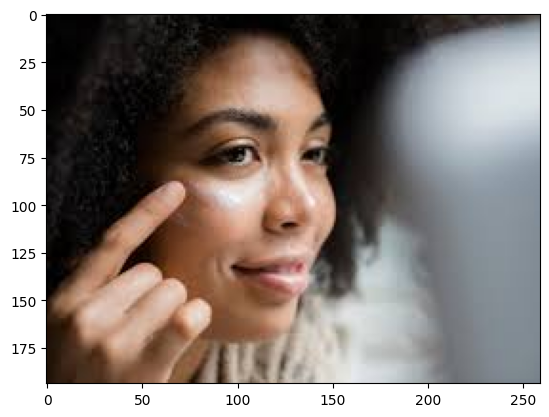

In [27]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2917.jpg')
imgplot = plt.imshow(img)
plt.show()

In [28]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [29]:
type(data)

list

In [30]:
len(data)

7553

array([[[ 18,  28,  54],
        [  9,  18,  47],
        [  1,   8,  41],
        ...,
        [  1,   0,  18],
        [  2,   0,  20],
        [  2,   0,  21]],

       [[ 12,  20,  48],
        [  5,  12,  42],
        [  1,   6,  38],
        ...,
        [  1,   0,  19],
        [  2,   0,  21],
        [  2,   0,  21]],

       [[  9,  18,  48],
        [  4,  10,  41],
        [  1,   5,  37],
        ...,
        [  2,   1,  19],
        [  1,   0,  19],
        [  1,   0,  19]],

       ...,

       [[246, 254, 255],
        [246, 254, 255],
        [246, 254, 255],
        ...,
        [149, 129, 139],
        [153, 132, 141],
        [155, 134, 143]],

       [[246, 254, 255],
        [246, 254, 255],
        [246, 254, 255],
        ...,
        [148, 128, 137],
        [151, 130, 139],
        [153, 132, 141]],

       [[246, 254, 255],
        [246, 254, 255],
        [246, 254, 255],
        ...,
        [146, 128, 136],
        [148, 128, 137],
        [151, 130, 140]]], dtype=uint8)
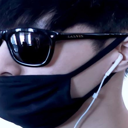

In [31]:
data[0]

In [32]:
type(data[0])

numpy.ndarray

In [33]:
data[0].shape

(128, 128, 3)

In [34]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [35]:
type(X)

numpy.ndarray

In [36]:
type(Y)

numpy.ndarray

In [37]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [38]:
print(Y)

[1 1 1 ... 0 0 0]


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [41]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[246, 246, 248],
        [246, 246, 248],
        [246, 246, 248],
        ...,
        [246, 246, 248],
        [246, 246, 248],
        [246, 246, 248]],

       [[246, 246, 248],
        [246, 246, 248],
        [246, 246, 248],
        ...,
        [246, 246, 248],
        [246, 246, 248],
        [246, 246, 248]],

       [[246, 246, 248],
        [246, 246, 248],
        [246, 246, 248],
        ...,
        [246, 246, 248],
        [246, 246, 248],
        [246, 246, 248]],

       ...,

       [[246, 246, 248],
        [246, 246, 248],
        [246, 246, 248],
        ...,
        [246, 246, 248],
        [246, 246, 248],
        [246, 246, 248]],

       [[246, 246, 248],
        [246, 246, 248],
        [246, 246, 248],
        ...,
        [246, 246, 248],
        [246, 246, 248],
        [246, 246, 248]],

       [[246, 246, 248],
        [246, 246, 248],
        [246, 246, 248],
        ...,
        [246, 246, 248],
        [246, 246, 248],
        [246, 246, 248]]], dtype=uint8)
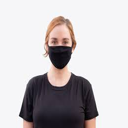

In [42]:
X_train[0]

In [43]:
X_train_scaled[0]

array([[[0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902],
        ...,
        [0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902]],

       [[0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902],
        ...,
        [0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902]],

       [[0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902],
        ...,
        [0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902]],

       ...,

       [[0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0.96470588, 0.97254902],
        [0.96470588, 0

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [47]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 153s 883ms/step - acc: 0.6884 - loss: 0.8573 - val_acc: 0.8942 - val_loss: 0.2821
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 836ms/step - acc: 0.8836 - loss: 0.2943 - val_acc: 0.8992 - val_loss: 0.2714
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 203s 841ms/step - acc: 0.8809 - loss: 0.2860 - val_acc: 0.8793 - val_loss: 0.2595
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 136s 800ms/step - acc: 0.9058 - loss: 0.2311 - val_acc: 0.9223 - val_loss: 0.1998
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 145s 819ms/step - acc: 0.9191 - loss: 0.2038 - val_acc: 0.9256 - val_loss: 0.2033


In [48]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 307ms/step - acc: 0.9127 - loss: 0.2028
Test Accuracy = 0.9133024215698242


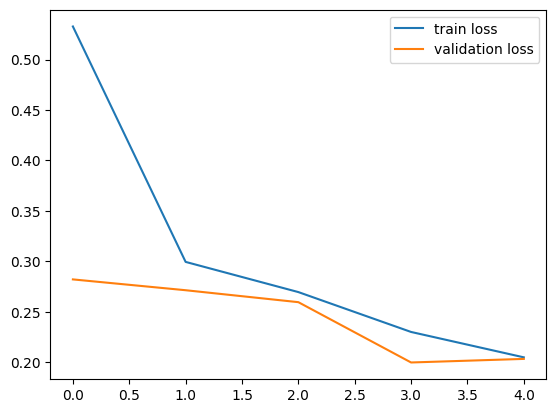

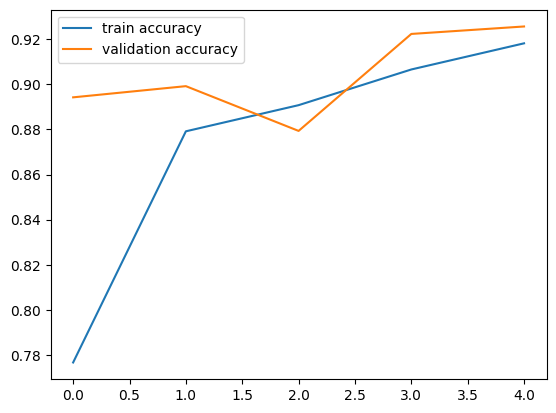

In [49]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/without_mask/without_mask_2947.jpg


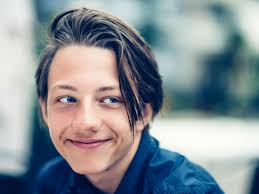

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.18619882 0.81541526]]
1
The person in the image is not wearing a mask


In [92]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

Path of the image to be predicted: /content/data/with_mask/with_mask_200.jpg


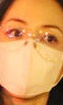

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.20915884 0.6756779 ]]
1
The person in the image is wearing a mask


In [98]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')